# Esercitazione 2

Gli scopi di questa esercitazione sono due. Il primo è quello di mostrare il miglioramento in efficienza del calcolo Monte Carlo di un integrale grazie all'utilizzo del metodo *importance sampling*. Il secondo è implementare la simulazione di un *Random Walk* in 3 dimensioni su un reticolo cubico e nel continuo. 

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from IPython.display import HTML

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Mostra/Nascondi celle</a>.''')

### Esercizio2.1

In questa prima parte calcoliamo numericamente il seguente integrale:

$$I = \int_0^1 \frac{\pi}{2}\cos\big(\frac{\pi x}{2}\big) dx = 1$$

1. campionando una distribuzione uniforme in $[0,1)$;
2. utilizzando l'*importance sampling* (cioè campionando una probabilità non uniforme in $[0,1)$).

Per ogni simulazione vengono calcolati valor medio e relativa incertezza statistica tramite il metodo *data blocking*. 
1) In primo luogo valutiamo l'integrale nel modo seguente:
$$I = \int_0^1 g(x)p(x)dx $$

dove $p(x)$ è una distribuzione uniforme in $[0,1)$ e $g(x)=\frac{\pi}{2}\cos(\pi x/2)$.
In questo modo dobbiamo semplicemente calcolare il valore di aspettazione di $g(x)$ secondo la distribuzione di probabilità $p(x)$. In questa simulazione vengono usate $10^4$ misurazioni suddivise in $100$ blocchi.

In [3]:
unif_sampl = np.loadtxt("uniform_sampling.dat")
imp_sampl1 = np.loadtxt("importance_sampling1.dat")
imp_sampl2 = np.loadtxt("importance_sampling2.dat")

M=1e4     
N=100
x= np.arange(1,N,1)

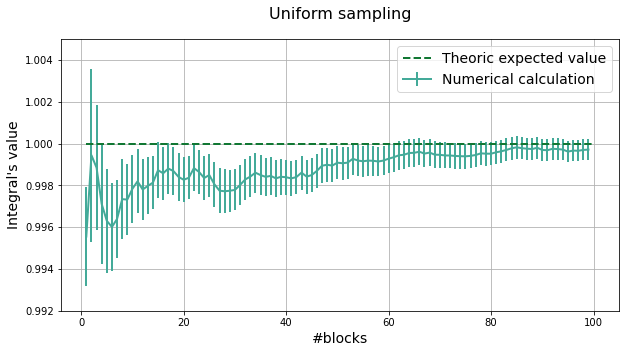

In [9]:
plt.figure(figsize=(10,5))
plt.title("Uniform sampling",fontsize=16, pad=20)
plt.errorbar(x, unif_sampl.T[0], yerr=unif_sampl.T[1], color='#44AA99', alpha=1, label='Numerical calculation', linewidth=2)
plt.hlines(1,1,100, color='#117733', linestyle='--', label="Theoric expected value", linewidth=2, alpha=1)
plt.ylabel("Integral's value",fontsize=14)
plt.xlabel("#blocks",fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.ylim(0.992,1.005)
plt.show()

2) L'*importance sampling* è una tecnica di riduzione della varianza che permette una più veloce convergenza al valore corretto dell'integrale con incertezza ridotta.
Riscrivendo l'integrale che vogliamo calcolare nel modo seguente,

$$I = \int_0^1 \frac{g(x)p(x)}{d(x)}\cdot d(x)\,dx $$

il metodo afferma che se $d(x)$ viene scelta il più possibile simile all'integranda $g(x)p(x)$, ciò riduce sensibilmente l'incertezza del risultato e ne velocizza la convergenza.
La $d(x)$ che garantisce un errore nullo per il metodo Monte Carlo si ottiene usando i moltiplicatori di Lagrange e il valore dell'integrale:

$$d(x)=\frac{g(x)p(x)}{I}\,\,\Rightarrow\,\,I_N=\frac{1}{N}\sum_{i=1}^{N}\frac{g(x_i)p(x_i)}{d(x_i)}=\frac{1}{N}\sum_{i=1}^{N}\frac{g(x_i)p(x_i)}{g(x_i)p(x_i)I^{-1}}=I$$

Nel nostro caso ha la forma seguente (in questo caso è noto $I=1$):

$$d(x)=\frac{g(x)p(x)}{I}=\frac{\pi}{2}\cos\big(x \frac{\pi}{2}\big)$$

Usando quindi il metodo della trasformata otteniamo che per il calcolo numerico dell'integrale è sufficiente generare una variabile random così definita:

$$x = \frac{2}{\pi}sin^{-1}(y)\,\,\,\text{con}\,\,y\in[0,1)\,\,\text{uniforme}$$

Scegliamo dunque di svolgere il calcolo numerico in due diverse modalità. Utilizziamo sia il metodo esatto, sia una $d(x)$ adeguata ad approssimare l'integranda.
Scegliamo a tal proposito la seguente funzione $d(x)=2(1-x)$ e da questa ricaviamo la corrispetiva CDF: $D(x)=2x-x^2$.
A questo punto sappiamo come campionare $x$, ossia invertendo $D$: $x = D^{-1}(y) = \sqrt{1-y} + 1$.
Per il calcolo numerico vengono effettuate $10^4$ misure suddivise in $100$ blocchi per tutti i dati. Ciascuna misura è il risultato di $100$ tentativi con i quali poi, attraverso il metodo della media, si ottiene una singola stima del valore dell'integrale.

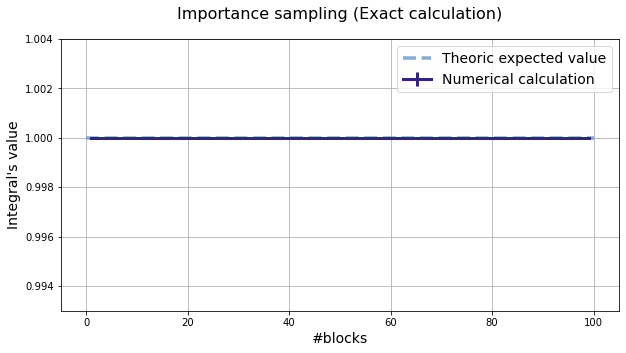

In [10]:
plt.figure(figsize=(10,5))

plt.title("Importance sampling (Exact calculation)",fontsize=16,pad=20)
plt.errorbar(x, imp_sampl1.T[0], yerr=imp_sampl1.T[1], color='#332288', alpha=1, label='Numerical calculation', linewidth=3)
plt.hlines(1,0,100, color='#6699CC', linestyle='--', label="Theoric expected value", linewidth=3.5, alpha=0.8)
plt.ylabel("Integral's value",fontsize=14)
plt.xlabel("#blocks",fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.ylim(0.993,1.004)
plt.show()

Come possiamo osservare dal grafico la convergenza al valore effettivo dell'integrale usando l'esatto *importance sampling* è evidente sin dal primo blocco e l'incertezza statistica è nulla.

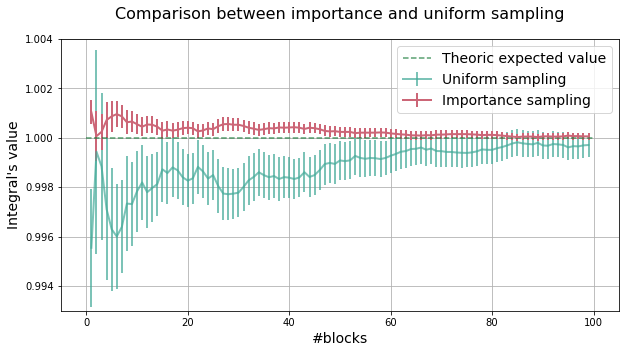

In [7]:
plt.figure(figsize=(10,5))
plt.title("Comparison between importance and uniform sampling",fontsize=16,pad=20)
plt.errorbar(x, unif_sampl.T[0], yerr=unif_sampl.T[1], color='#44AA99', alpha=0.7, label='Uniform sampling', linewidth=2)
plt.errorbar(x, imp_sampl2.T[0], yerr=imp_sampl2.T[1], color='#CC6677', alpha=1, label='Importance sampling', linewidth=2)
plt.hlines(1,0,100, color='#117733', linestyle='--', label="Theoric expected value", linewidth=1.5, alpha=0.7)
plt.ylabel("Integral's value",fontsize=14)
plt.xlabel("#blocks",fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.ylim(0.993,1.004)
plt.show()

In [8]:
mean_err1=0
mean_err2=0
n=len(unif_sampl.T[1])
for i in range(n):
    mean_err1 += unif_sampl.T[1][1]
    mean_err2 += imp_sampl2.T[1][1]
mean_err1 /= n
mean_err2 /= n
#mean_err1/mean_err2

Come possiamo notare dal grafico qui sopra, vengono messe a confronto le due tecniche. 
L'errore dovuto all'uso del metodo *uniform sampling* è mediamente circa 4.14 volte superiore rispetto a quello ottenuto con il metodo *importance sampling*. Questa seconda tecnica dunque sembra essere tra le due la più efficiente.

### Esercizio2.2

In questa seconda parte viene simulato un Random Walk tridimensionale, nel caso di step di ampiezza $a=1$ vincolati ai siti discreti di un reticolo cubico e nel caso continuo (in questo caso lo step viene identificato come uno spostamento di modulo unitario dello spazio 3D). 
Lo scopo è dunque studiare l'andamento della distanza media percorsa dal walker a partire dall'origine al crescere del numero di passi effettuati.
Per entrambi i cammini la simulazione prevede $5\cdot10^5$ misure per ciascun passo $j$ del cammino (j=0..100) e tramite il metodo data-blocking ($5\cdot10^3$ misure per blocco) viene stimato il valor medio e l'incertezza associata.

Nel caso del Random Walk discreto ogni passo del percorso viene scelto di modulo unitario lungo una direzione scelta casualmente tra sei casi possibili (essendo il passo vincolato al reticolo): avanti o indietro per la coordinata $x_i$ con $i=1,2,3$.  
Nel caso continuo invece vengono campionati i due angoli $\phi$ e $\theta$, il primo da una distribuzione uniforme tra $[0,2\pi]$ e il secondo attraverso il metodo dell'inversa della cumulata ($\theta = \cos^{-1}(1-2u)$ dove $u\in[0,1)$). 
In questo modo siamo in grado di costruire un set di coordinate nello spazio 3D per il walker:
$$\begin{cases}
  x_{j+1} = x_{j} + a\sin(\theta)\cos(\phi)\\
  y_{j+1} = y_{j} + a\sin(\theta)\sin(\phi)\\
  z_{j+1} = z_{j} + a\cos(\theta)
\end{cases}$$

In [24]:
drw= np.loadtxt("discrete_random_walk.dat")
crw= np.loadtxt("continous_random_walk.dat")
x=np.arange(0,100,1)
y=np.arange(0,100,0.1)

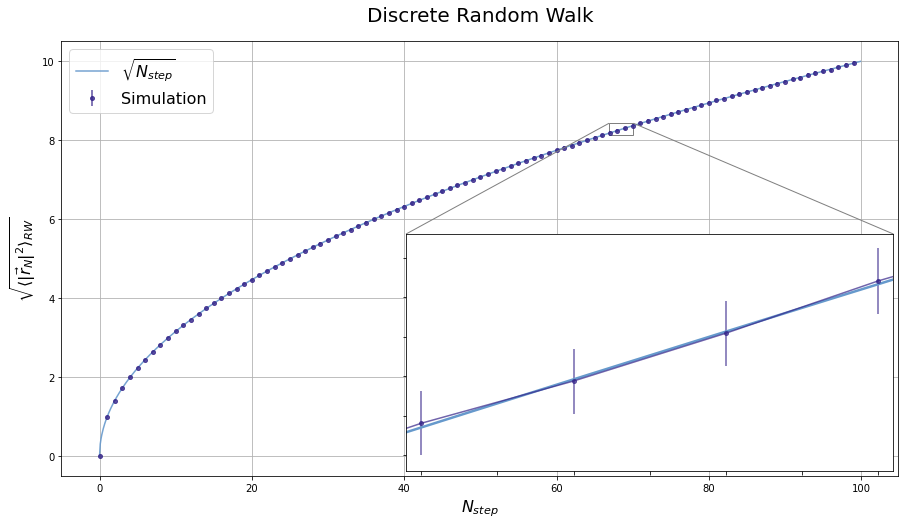

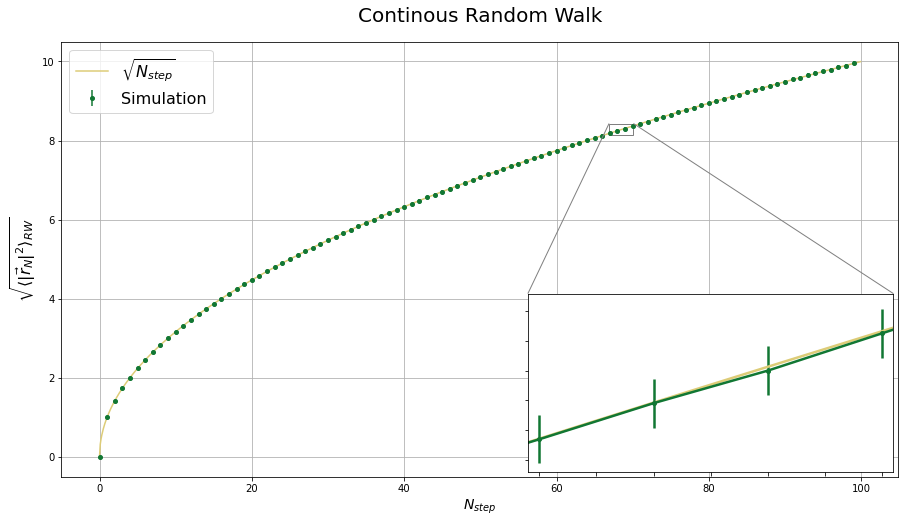

In [26]:
#RW DISCRETO:
fig, ax = plt.subplots(figsize=[15, 8])

plt.title("Discrete Random Walk",fontsize=20,pad=20)
ax.plot(y,np.sqrt(y),color='#6699CC',label= r'$\sqrt{N_{step}}$',linestyle='-',linewidth=1.5,alpha=0.9)
ax.errorbar(x, drw.T[0], yerr=drw.T[1], color='#332288', alpha=0.8, label='Simulation',marker='.',markersize=8, linestyle='None')
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$',fontsize=16)
plt.xlabel(r'$N_{step}$',fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)

axins=zoomed_inset_axes(ax,20,loc=4)   
x1, x2, y1, y2 = 66.9, 70.1, 8.13, 8.43
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)
axins.plot(y, np.sqrt(y), color='#6699CC', linestyle='-', linewidth=2.5, alpha=1)
axins.errorbar(x,drw.T[0],yerr=drw.T[1], color='#332288',marker='.',markersize=8,linewidth=1.5,alpha=0.7)
mark_inset(ax,axins,loc1=1,loc2=2,fc='none',ec='0.5')
plt.grid(False)
plt.show()

##################################################################################################################
#RW CONTINUO:
fig, ax = plt.subplots(figsize=[15, 8])

plt.title("Continous Random Walk",fontsize=20,pad=20)
ax.errorbar(x, crw.T[0], yerr=crw.T[1], color='#117733', alpha=1, label='Simulation',marker='.',markersize=8, linestyle='None')
ax.plot(y,np.sqrt(y),color='#DDCC77',label= r'$\sqrt{N_{step}}$',linestyle='-',linewidth=1.5)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$',fontsize=16)
plt.xlabel(r'$N_{step}$',fontsize=14)
plt.grid(True)
plt.legend(fontsize=16)

axins=zoomed_inset_axes(ax,15,loc=4)   
x1, x2, y1, y2 = 66.9, 70.1, 8.13, 8.43
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)
axins.plot(y, np.sqrt(y), color='#DDCC77', linestyle='-', linewidth=2.5, alpha=1)
axins.errorbar(x,crw.T[0],yerr=crw.T[1], color='#117733',marker='.',markersize=8,linewidth=2.5)
mark_inset(ax,axins,loc1=1,loc2=2,fc='none',ec='0.5')
plt.grid(False)
plt.show()

Nei grafici sopra riportati possiamo osservare come l'andamento di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ segua la legge espressa da $\sqrt{N_{step}}$ sia nel caso di random walk discretizzato sia nel caso continuo. Infatti i dati misurati sono compatibili con la curva teorica e questo risultato ci dice come il processo stocastico analizzato sia un processo diffusivo. Infatti, la distribuzione di probabilità che descrive l'andamento della distanza media percorsa dall'origine è una gaussiana con media costante (fissa nell'origine) e con deviazione standard crescente come la radice del numero di step compiuti.